# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform                 
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

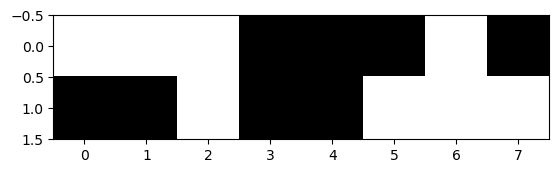

In [3]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1
here the transition from 0 to 1 or from 1 to 0 is equal to V(0,1) = V(1,0) = $\beta$ otherwise equal to zero (V(0,0) = V(1,1) = 0)

the Total energy has the following energy :  $ U(x) = \sum_{c=1}^{C} V_c(x) $

Applying this formula on the above example so we get :

for the horizontal transition we get :
first line ---> v(0,1) = v(1,2) = v(3,4) = v(4,5) = 0 and v(2,3) = v(5,6) = v(6,7) = $\beta$
second line ---> v(0,1) = v(3,4) = v(5,6) = v(6,7) = 0 and v(1,2) = v(2,3) = v(4,5) = $\beta$
passing column by column we have only at the position 2 ,3 ,4 ,6 we have that the trasintion is equal to 0 otherwise it is equal to $\beta$

So the total energy is equal to :  U(x) = 10 $\beta$

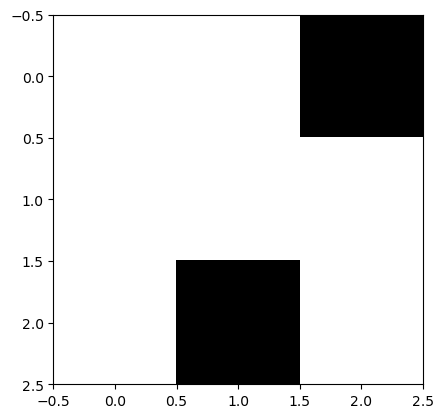

In [10]:
sh=[3,3]
    
imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2
based on the figure above and assuming that it is 4 connections :
assume that we our centred pixel has a value of zero so the total energy is as follow :

U(x) = 3 $\beta$

in case the value of the pixel is 1 :

U(x) = $\beta$


based on the conditional probability :

$$ \text{Pr}(X_s = x_s / V_s) = \frac{1}{Z_s} \exp(-U_s(x_s, V_s)) $$

since the energy is high for the case of black pixel so the centred pixel is likely to be a black pixel.

(this is based on the course and the law that relate the energy to the probability)

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



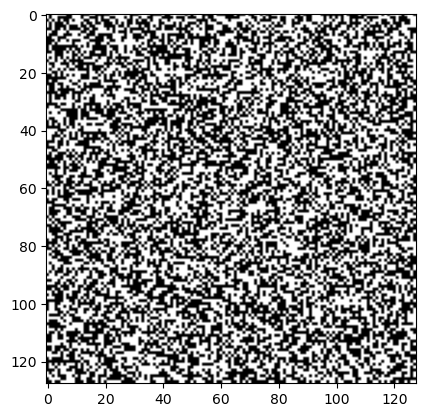

In [2]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [3]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            im_bin[i,j] =0 
            Ureg0 = np.abs((im_bin[i,j] - im_bin[i1,j]))*beta_reg + beta_reg*np.abs((im_bin[i,j] - im_bin[i,j1]))+beta_reg*np.abs((im_bin[i,j] - im_bin[i,j2]))+beta_reg*np.abs((im_bin[i,j] - im_bin[i2,j]))
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            im_bin[i,j] =1 
            Ureg1 = np.abs((im_bin[i,j] - im_bin[i1,j]))*beta_reg + beta_reg*np.abs((im_bin[i,j] - im_bin[i,j1]))+beta_reg*np.abs((im_bin[i,j] - im_bin[i,j2]))+beta_reg*np.abs((im_bin[i,j] - im_bin[i2,j]))
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

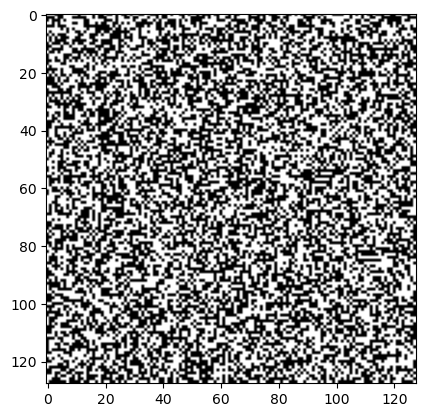

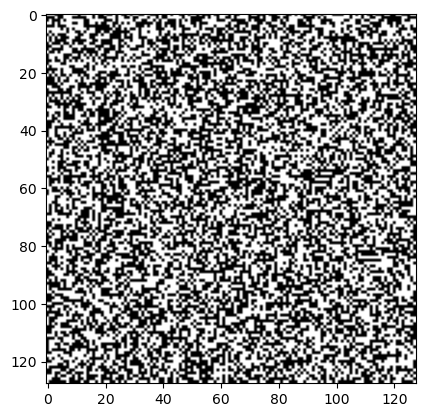

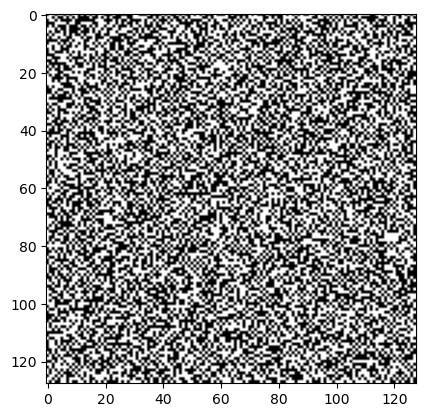

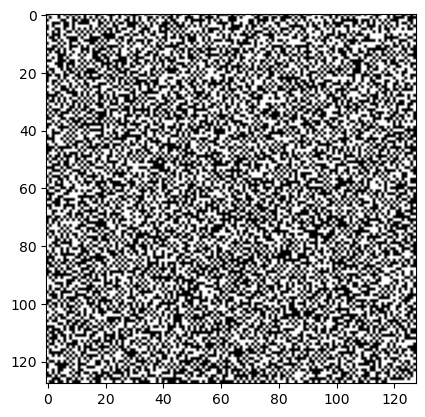

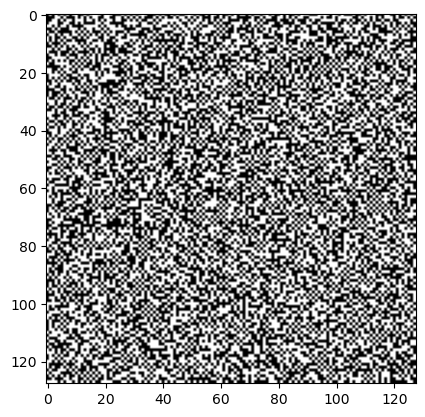

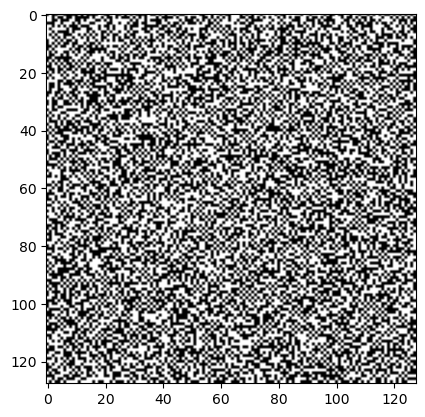

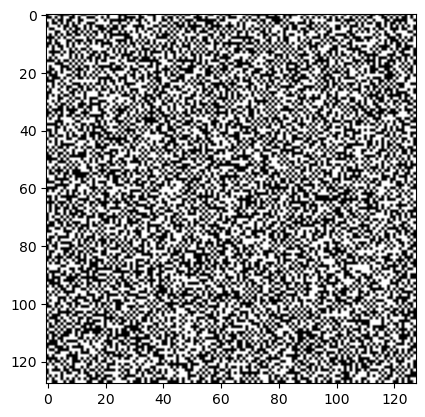

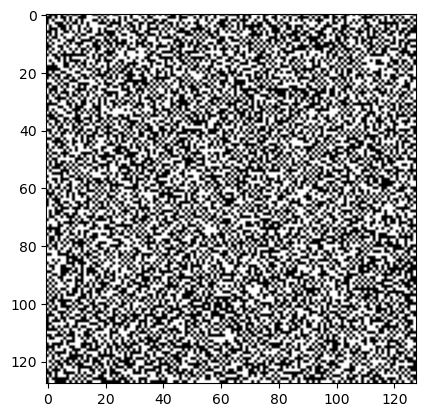

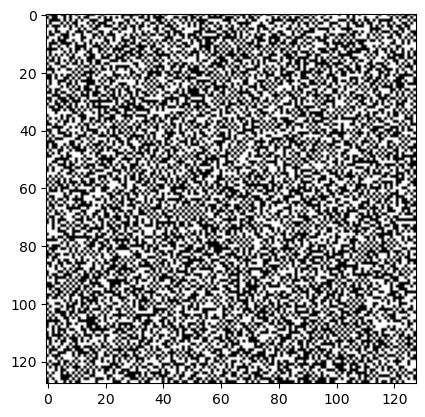

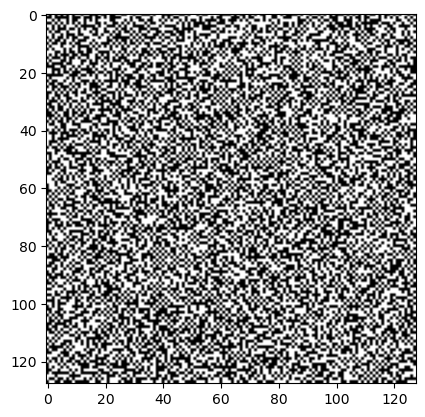

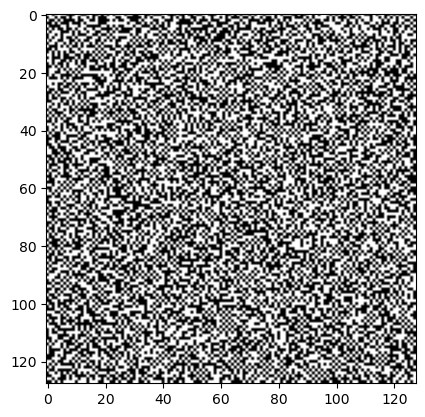

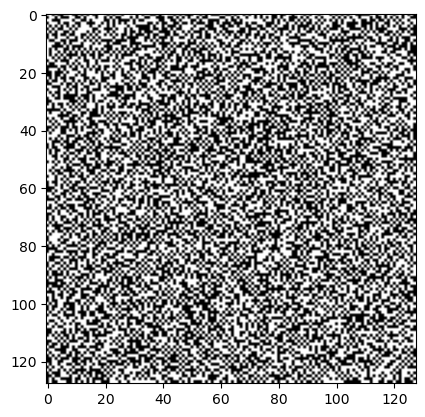

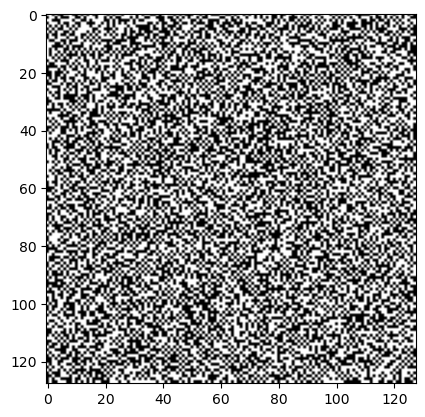

In [7]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=-0.5

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

Answer:

In the context of algorithm convergence, it implies achieving a result in accordance with probability laws, rather than identical outcomes, thereby resulting in the generation of distinct images.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

Answer:

With a very low value such as 0.5, the outcome closely resembles the initial image which was generated randomly. As we increase this value, more homogeneous dark or light areas start to emerge, we can see that through the example above (where beta is equal to 20 we consider it as high) which indicates that the global energy is low because of the existence of the small transitions that appear in the case where the value of the beta is very high (20).

#Q5
Which image minimizes the overall energy for this model?

Answer :

here we have to differentiate between two case for $\beta$ (positive and negative):

first consider the case where the beta is positive:

As long as the transition is high (many transitions exist which means transitions from black to white) so we get a high value of the global energy so the image that reduces the global energy is the image that does not presents or contains any transition (zero transition) in our case the image is the white or black image (all pixels are black or they are white) because it ensures that no transitions exist in this case the all V(0,0) or V(1,1) are zero, thus th energy in this case is minimal (mostly 0)

Second case where $\beta$ is negative:

the energy calculated is function of beta for example 2*$\beta$,3*$\beta$,etc... however $\beta$ here is negative so the higher transition the lower energy. to conclude the image that minimize the energy is the is that one that presents the maximum of transition in this case the image is the alternative image 1,0 successive (sequence of black and white pixels over all the image)

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

Answer :

In the resulting image, many black pixels are adjacent to light pixels. With beta being negative, the class with greater energy is reversed. Hence, if a pixel to be estimated has more class 0 neighbors, its energy for class 0 will surpass that for class 1, increasing the likelihood of it being predicted as class 1.

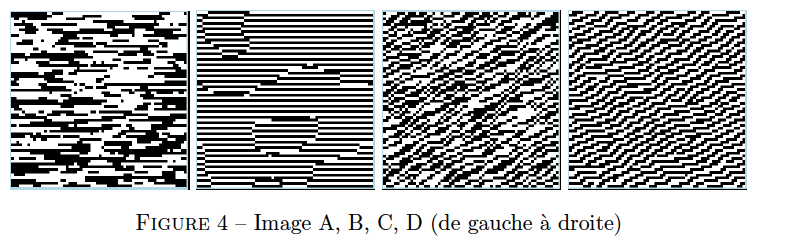

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





Answer:

For Image A with a (-1) potential: The focus is on encouraging the more prevalent configuration. The horizontal potential is thus set at -1 for V(0,0) and V(1,1).

In Image B with a (+1) potential: The objective is to deter the contrasting configuration. Therefore, the vertical potential is established at 1 for V(0,1) and V(1,0).

For Image C with a (-1) potential: The goal is to favor the more usual configuration. Consequently, the diagonal potential at a 45-degree angle is determined to be -1 for V(0,0) and V(1,1).

In Image D with a (+1) potential: The aim is to discourage the alternative configuration. Thus, the diagonal potential at a 135-degree angle is fixed at 1 for V(0,0) and V(1,1).


#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

Here is the code :

In [16]:
import math
import random
import numpy as np

def sample_image(binary_image, beta_reg):
    nrows, ncols = binary_image.shape

    for i in range(nrows):
        for j in range(ncols):
            # Calculate indices for neighboring pixels with wrap-around
            neighbors_indices = [(i-1)%nrows, (i+1)%nrows, (j-1)%ncols, (j+1)%ncols]
            
            # Extract diagonal neighbors
            diag_neighbors = [binary_image[neighbors_indices[0], neighbors_indices[2]], 
                              binary_image[neighbors_indices[0], neighbors_indices[3]],
                              binary_image[neighbors_indices[1], neighbors_indices[2]], 
                              binary_image[neighbors_indices[1], neighbors_indices[3]]]

            # Calculate energies and probabilities for both classes
            energy_class_0 = beta_reg * sum(abs(0 - neighbor) for neighbor in diag_neighbors)
            prob_class_0 = math.exp(-energy_class_0)

            energy_class_1 = beta_reg * sum(abs(1 - neighbor) for neighbor in diag_neighbors)
            prob_class_1 = math.exp(-energy_class_1)

            # Normalize probabilities and sample new pixel value
            total_prob = prob_class_0 + prob_class_1
            if total_prob != 0:
                binary_image[i, j] = 0 if random.uniform(0, 1) < prob_class_0 / total_prob else 1

    return binary_image


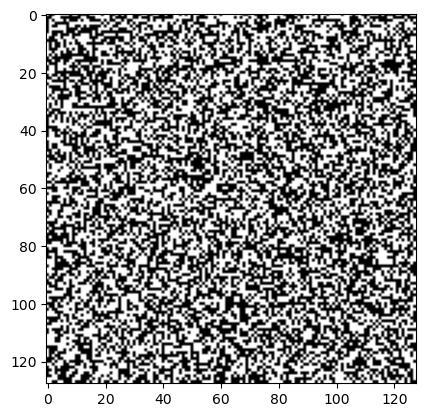

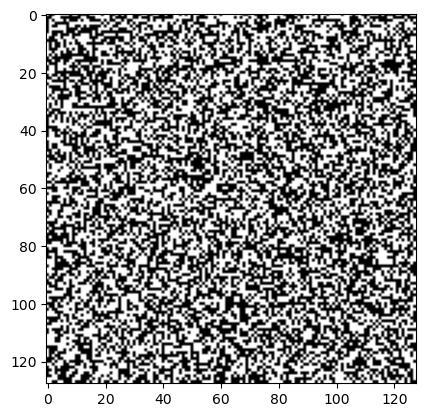

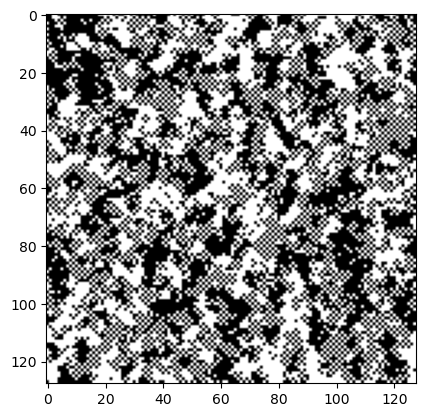

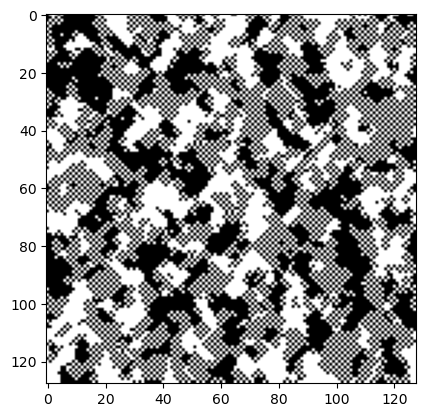

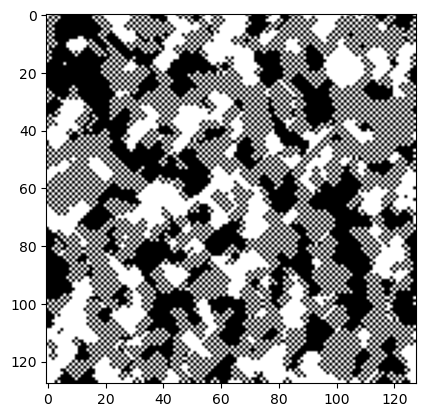

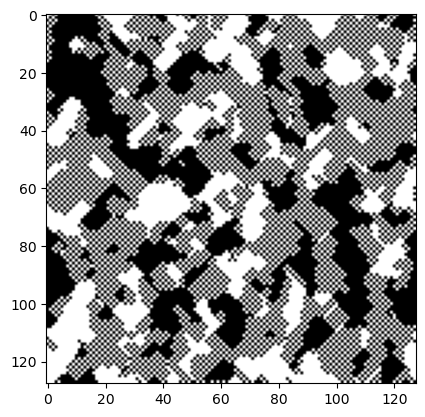

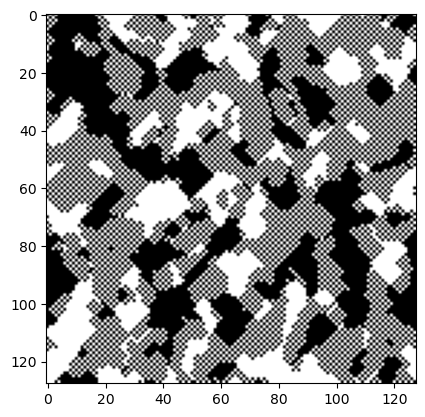

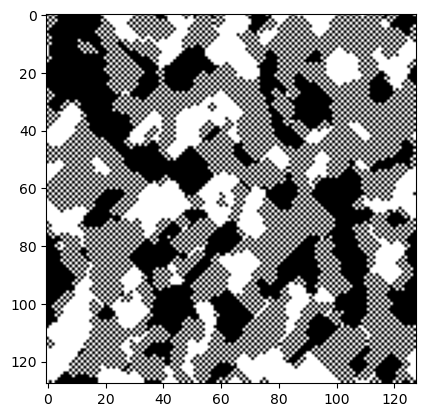

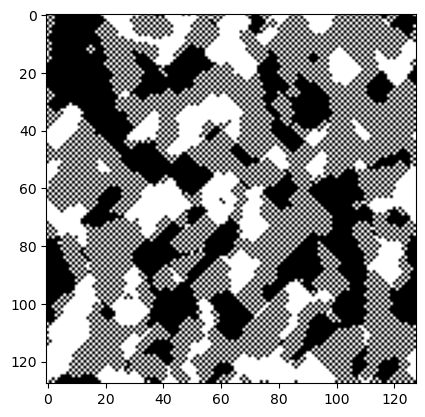

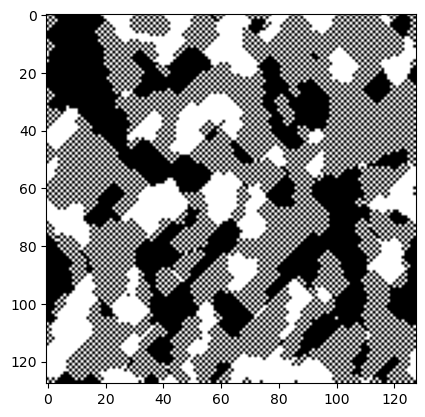

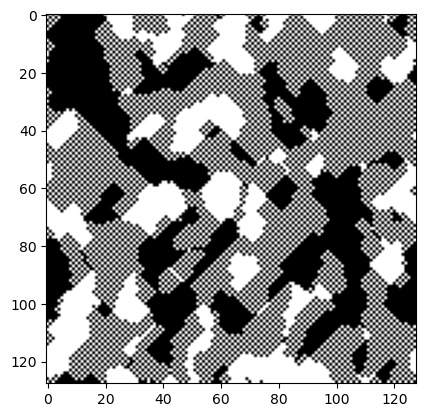

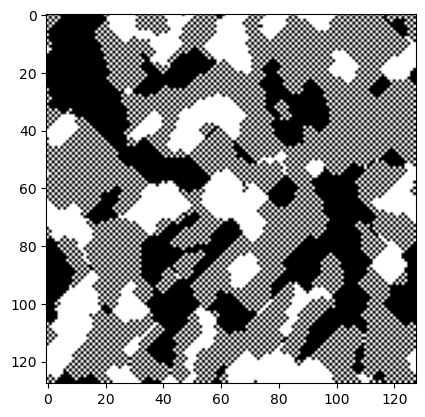

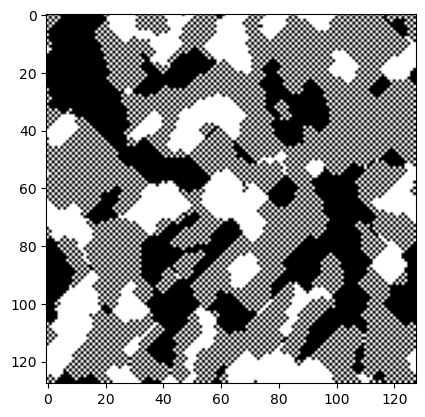

In [17]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()
plt.imshow(im_bin)
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

Comment:

we can see the appearence of diagonal patterns in both directions ($\pi$/4 and 3*$\pi$/4)